/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


🎭 Predicted Emotion: OPTIMISM (75.47%)



,label,score
0,optimism,75.472975
1,sadness,11.829636
2,anger,10.672320
3,joy,2.025069


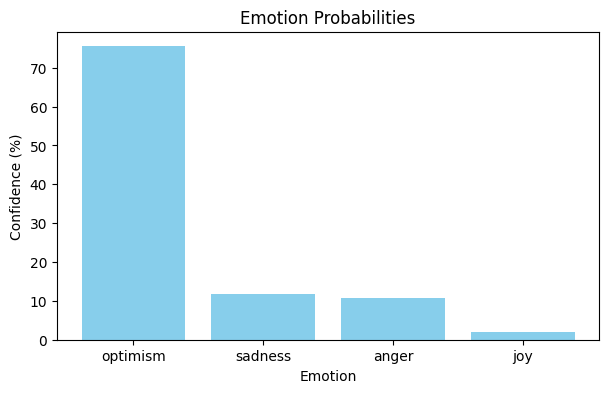

In [1]:
# ============================================
# 🎵 SONG LYRICS EMOTION ANALYZER — COLAB EDITION
# ============================================

!pip install transformers torch matplotlib pandas -q

from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

# (CardiffNLP’s model trained on 6 Twitter emotions)
classifier = pipeline(
    "text-classification",
    model="cardiffnlp/twitter-roberta-base-emotion",
    framework="pt",
    top_k=None
)

def analyze_emotion(lyrics):
    results = classifier(lyrics, top_k=None)
    df = pd.DataFrame(results).sort_values("score", ascending=False)
    df["score"] = df["score"] * 100

    top_emotion = df.iloc[0]["label"]
    confidence = df.iloc[0]["score"]

    print(f"🎭 Predicted Emotion: {top_emotion.upper()} ({confidence:.2f}%)\n")
    display(df)

    # Plot bar chart
    plt.figure(figsize=(7,4))
    plt.bar(df["label"], df["score"], color="skyblue")
    plt.title("Emotion Probabilities")
    plt.ylabel("Confidence (%)")
    plt.xlabel("Emotion")
    plt.show()

lyrics = """I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is falling too
I'm in love with your body"""
analyze_emotion(lyrics)


In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(lyrics)

if sentiment['compound'] > 0:
    overall = "Positive"
elif sentiment['compound'] < 0:
    overall = "Negative"
else:
    overall = "Neutral"

print("Sentiment Polarity:", overall)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Polarity: Positive


In [7]:
# Install dependencies
!pip install transformers torch -q

# Import
from transformers import pipeline

# Load zero-shot classification model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define possible emotion labels
emotion_labels = ["love", "joy", "sadness", "anger", "fear", "surprise"]

# Function for lyric analysis
def analyze_emotion(lyrics):
    result = classifier(lyrics, emotion_labels)
    scores = dict(zip(result["labels"], result["scores"]))
    sorted_scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))
    top_emotion = max(sorted_scores, key=sorted_scores.get)
    print(f"🎭 Predicted Emotion: {top_emotion.upper()} ({sorted_scores[top_emotion]*100:.2f}%)")
    print("\nFull breakdown:")
    for k, v in sorted_scores.items():
        print(f"{k.capitalize():<10}: {v*100:.2f}%")

# Test examples
lyrics = """I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is falling too
I'm in love with your body"""
analyze_emotion(lyrics)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


🎭 Predicted Emotion: LOVE (78.79%)

Full breakdown:
Love      : 78.79%
Surprise  : 11.83%
Joy       : 4.89%
Sadness   : 2.55%
Fear      : 0.98%
Anger     : 0.96%


In [8]:
lyrics = """Hold me close, don’t let me go
Your eyes tell stories I need to know
You’re the calm in my stormy sea
Every beat of my heart says you and me"""
analyze_emotion(lyrics)

🎭 Predicted Emotion: LOVE (63.22%)

Full breakdown:
Love      : 63.22%
Surprise  : 15.23%
Joy       : 10.12%
Fear      : 5.81%
Sadness   : 2.97%
Anger     : 2.65%


In [9]:
lyrics = """You broke every promise"""
analyze_emotion(lyrics)

🎭 Predicted Emotion: SURPRISE (57.79%)

Full breakdown:
Surprise  : 57.79%
Anger     : 20.69%
Sadness   : 15.90%
Fear      : 4.40%
Joy       : 0.83%
Love      : 0.38%


In [10]:
lyrics = """We laughed through tears, the night was cold
Stories we’ll never again be told
A bittersweet goodbye, soft and true
I’m happy and broken because of you"""
analyze_emotion(lyrics)

🎭 Predicted Emotion: SADNESS (44.31%)

Full breakdown:
Sadness   : 44.31%
Love      : 23.86%
Surprise  : 19.72%
Joy       : 5.88%
Fear      : 4.85%
Anger     : 1.38%
